<a href="https://colab.research.google.com/github/pavi-1994/Coronaviruse_tweet_analysis/blob/main/CoronaViruse_Tweet_Aanlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CoronaViruse Tweet Aanlysis**

##Problem Description

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.


The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing data

In [3]:
#importing dataset
path="/content/drive/MyDrive/almabetter/module 4/corornaviruse_tweet analysis/Coronavirus Tweets.csv"
corona_df=pd.read_csv(path, encoding='latin-1')

### First View Of Data

In [4]:
#last 5 rows of the dataset
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
#last 5 rows of the dataset
corona_df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Creating the copy of dataset


In [6]:
#create a copy
crn_df=corona_df.copy()

Lets see shape and size of the data

In [7]:
#no. of rows and columns
corona_df.shape

(41157, 6)

In [8]:
#details about columns
corona_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [9]:
# datatypes of features present in the dataframe
print(f'Feature datatype of customer_df :\n\n {corona_df.dtypes}')

Feature datatype of customer_df :

 UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object


In [10]:
# check no of unique element present in each feature (columns)
corona_df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [11]:
#detailed information of the data
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [12]:
#percentage of missing values
def missing_value_percent(df):
    ''' function receives dataframe as input
    prints the features with missing value and percentage of missing values'''
    
    print('Missing Data Count')
    print(df.isnull().sum().sort_values(ascending = False))

    print('--'*50)
    print('Missing Data Percentage')
    print(f'{round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)}%')

In [13]:
#missing value counts and percentage
missing_value_percent(corona_df)

Missing Data Count
Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Location         20.87
UserName          0.00
ScreenName        0.00
TweetAt           0.00
OriginalTweet     0.00
Sentiment         0.00
dtype: float64%


<Axes: >

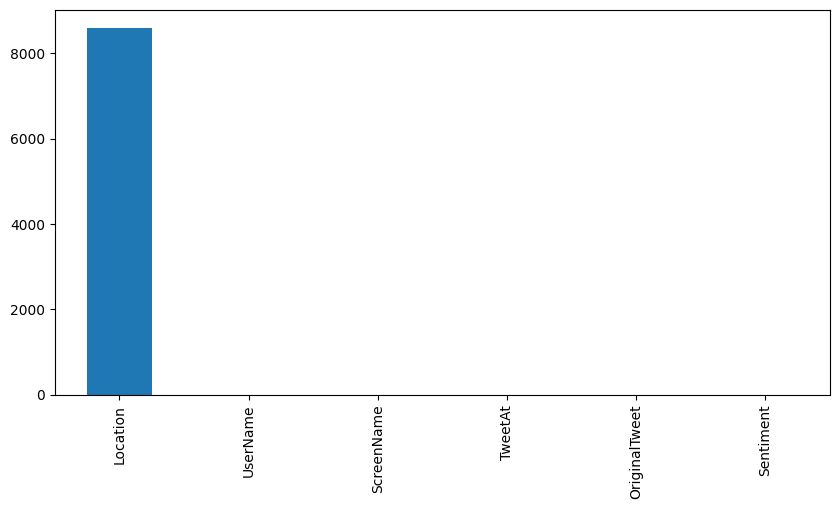

In [14]:
#plotting graph
plt.figure(figsize=(10,5))
corona_df.isnull().sum().sort_values(ascending=False).plot(kind="bar")

### Count of dupicate values

In [15]:
# count of duplicate rows
print(f' Number of duplicated observation present in the dataset:{corona_df.duplicated().sum()}')

 Number of duplicated observation present in the dataset:0


### **Details about the data**
we observed the dataset contains 6 features  

• Username : gives the name of the user (int64)

• Screenname: gives the screen name of the user (int64)

• Location: gives information regarding the location from which tweet is sent

• Tweet At: gives the date of the Tweet

• Original Tweet : Tweet Content

and sentiment as dependent feature

By detailed study we observed that the dataset the feature Location include missing values that is around 20% of total data.

In [16]:
#using describe function and including all numerical as well as categorical feature
corona_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,41157.0,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0


In [17]:
corona_df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

### Visualization of the categorical feature


In [18]:
def visualize_feature(df,feature):

    '''function takes feature name as input and 
    prints the output of features value_count , visualize using pie plot and countplot'''
    print(f'value_count of {feature}')
    print(df[feature].value_counts())

    print("\n\n")
    
    # Visualize feature
    #visualization through pie plot
    df[feature].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

###**Target Variable**:

In [19]:
# To find the unique values in sentiment column
corona_df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

value_count of Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64





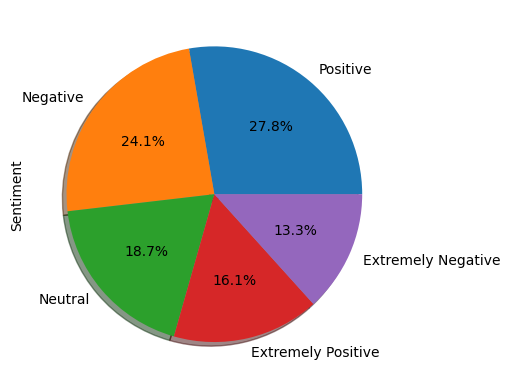

In [20]:
visualize_feature(corona_df,"Sentiment")

## Based on location

In [21]:
#Top 5 locations of tweet
location_based_top_tweetcount=corona_df['Location'].value_counts().head(5)
loc_df = pd.DataFrame(location_based_top_tweetcount)
loc_df.reset_index(inplace=True)
# rename the columns
loc_df = loc_df.rename(columns={'index':'Location', 'Location':'Tweet_count'})
loc_df

,Location,Tweet_count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373


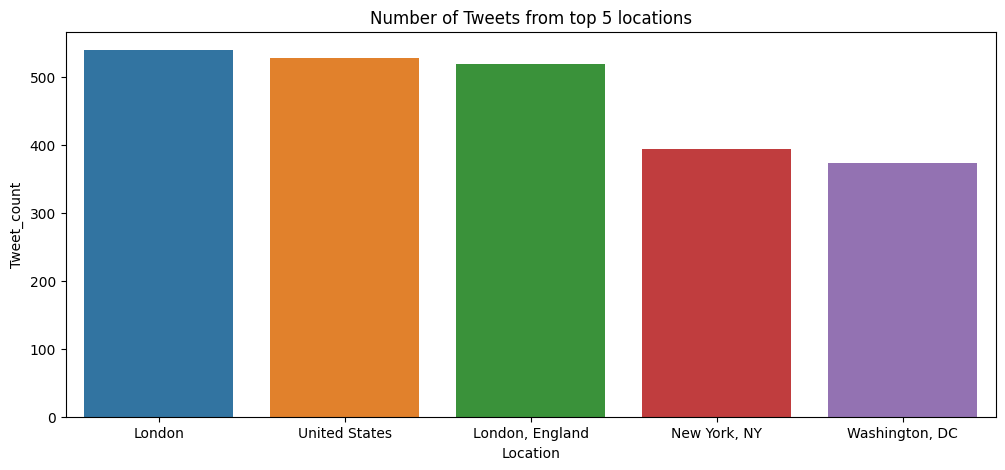

In [22]:
#visualisation of number of tweets from top 5 locations
plt.figure(figsize=[12,5])
sns.barplot(x=loc_df['Location'],y=loc_df['Tweet_count'])
plt.title("Number of Tweets from top 5 locations")
plt.show()

from these we can observe that the top countries from where  the tweet is made is high in count is UK and US